In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import auc,f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RepeatedStratifiedKFold

In [2]:
#########################
#Load Dataset

In [3]:
df = pd.read_csv('2_Cleaned_Data.csv')

In [4]:
X = df.drop(['target','hhld_id'],axis=1)
y = df['target'].astype('category')

In [5]:
####################
#Logistic Regression

In [6]:
#########################
#Repeated Cross Validation

In [7]:
# define model
model = LogisticRegression(solver='lbfgs', class_weight= 'balanced')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [8]:
# evaluate model
accuracy_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
rocauc_scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
recall_scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
precision_scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.3f' % np.mean(accuracy_scores))
print('Mean Roc Auc: %.3f' % np.mean(rocauc_scores))
print('Mean Recall: %.3f' % np.mean(recall_scores))
print('Mean Precision: %.3f' % np.mean(precision_scores))

Mean Accuracy: 0.898
Mean Roc Auc: 0.947
Mean Recall: 0.894
Mean Precision: 0.365


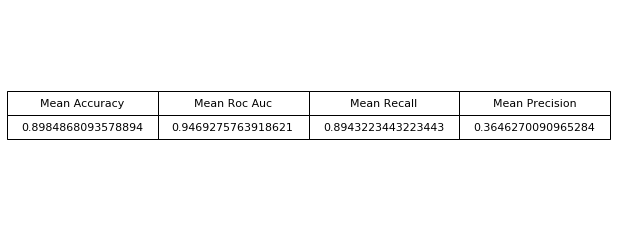

In [9]:
fig, ax =plt.subplots()
clust_data = [[np.mean(accuracy_scores), np.mean(rocauc_scores),np.mean(recall_scores), np.mean(precision_scores)]]
collabel=("Mean Accuracy", "Mean Roc Auc", "Mean Recall", "Mean Precision")
ax.axis('tight')
ax.axis('off')
df = pd.DataFrame(clust_data, columns=collabel)

table= ax.table(cellText=df.values, colLabels=df.columns, loc='center')
table.set_fontsize(30)
table.scale(1.8, 2)
plt.savefig('Generated_Image/LG_Scrore', bbox_inches = 'tight')

plt.show()